# Tensorflow detecting number in handwritten based on pixels

### 1. Import TF

In [1]:
import tensorflow as tf

### 2. load dataset

In [2]:
mnist=tf.keras.datasets.mnist #28*28 images of hand-written digits 0-9

### 3. allocate the train and test based on dataset

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

### Example of what is in the dataset

#### a. Print index [0], you can see that was multi dimentional array (28*28) in number

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

#### b. show index [0] using plt.show, you can see that was number in pixels that needs to be predict

<function matplotlib.pyplot.show(*args, **kw)>

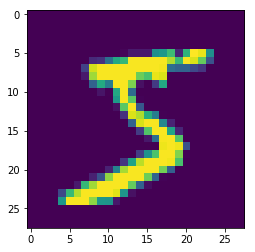

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

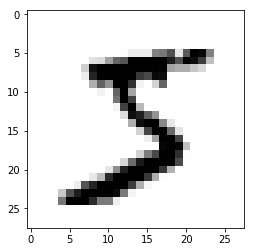

In [6]:
#if you want , cmap=plt.cm.binaryto see with black and white pixels, change the cmap into binary 
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

## 4. Based on the example of the printed number, the range is to large from one to another so we need to normalized and scale the dataset

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

##### you can check that the dataset somehow change into detail predictive that number '5' has the head and the tail like this

<function matplotlib.pyplot.show(*args, **kw)>

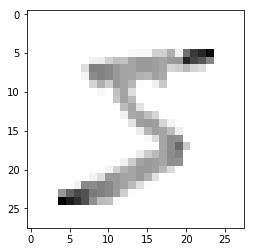

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

## 5. Build the model

#### the model that we need to make have 4 layer. first layer (1), hidden layer(2), output layer (1)

In [10]:
#state the model

model = tf.keras.models.Sequential()

#### after build the models we need to make the additional or the models that we want to make a layer

In [11]:
#the first one is the first layer. 
# based on tutorial on the youtube because it need to simplify since it is a multidimensional array 28*28 into 28*1

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

#the second one is the hidden layer. 
# parameter 128 is the number of neurons or layers you want to filter.
# parameter activation is a sigmoid function (between 1-0, not really far in range)
# sub parameter tf.nn.relu is rectified linear and default function of 'activation' it self

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#the last one is output layer
#parameter 10 is refers to the output itself = 0,1,2,3,4,5,6,7,8,9 that gonna predict
#sub parameter softmax is to predict the probability distribution (refers to where the closest criteria from the output)

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


#### after modified the parameters model, we need to train the model

In [12]:
# compile transorm it into, 
# optimizer is optimizer(the adam is default go-to optimizer. the optimizer type can be gradient descent, stochostic)
# loss is the number of wrong predicted (the number of error) the less loss you got the more accuracy of the predictions
# loss subparameter 'sparse_categorical_crossentropy'. for the dogs and cats we can use 'binary'
# metrics is what the key that can be calculated if the model was good. we use accuracy

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.2557 - acc: 0.9256
Epoch 2/3
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.1047 - acc: 0.9681
Epoch 3/3
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.0730 - acc: 0.9772


#### after train the model, measure the value of loss and value of accuracy from the test model

In [13]:
val_loss, val_acc=model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 5s 526us/sample - loss: 0.0879 - acc: 0.9727s - loss: 0.0859 - acc:
0.08786512710237876 0.9727


#### save the model that have created

In [14]:
model.save('pembaca_angka.model')

#### load the model to make a prediction

In [15]:
new_model=tf.keras.models.load_model('pembaca_angka.model')

# 6. Make a Prediction

#### if you predict it directly, the output of the prediction should've been list

In [16]:
predictions = new_model.predict([x_test])

In [17]:
print(predictions)

[[5.8388959e-08 8.0527638e-09 1.5399752e-05 ... 9.9997175e-01
  3.2260257e-09 1.3346712e-06]
 [6.6323702e-10 9.5495809e-05 9.9990416e-01 ... 2.0857551e-09
  1.9587578e-09 1.1232028e-14]
 [2.4910058e-08 9.9995947e-01 1.5589396e-05 ... 8.4108106e-06
  1.4195308e-05 2.9363203e-08]
 ...
 [8.8815595e-09 6.3280813e-06 7.0487170e-07 ... 4.8658396e-05
  5.8445448e-07 1.6994693e-04]
 [7.5979658e-09 4.6306297e-07 3.8545569e-08 ... 1.9295368e-07
  3.0424405e-04 6.6384274e-08]
 [8.5548841e-08 4.6526207e-08 2.6919958e-08 ... 5.7620532e-12
  3.8178527e-08 5.5187192e-12]]


#### it is one hot binary. so you should use numpy to pass the list for prediction

In [18]:
import numpy as np
print(np.argmax(predictions[22]))

6


#### the prediction of x_test[0] is 7. lets look at the actual x_test

<function matplotlib.pyplot.show(*args, **kw)>

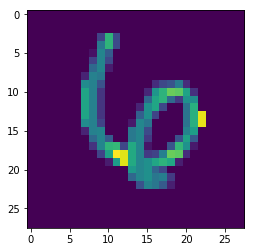

In [20]:
plt.imshow(x_test[22])
plt.show

# Conclusion

- neural network not-really-refers to over fitting. they refers to which mostly powerfull measurement to predict the output
- neural network learns the patterns
- the type of this tutorial parameter can be design
- neural network with so many layers predicts more accurate